In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!gdown --id 1Uxw4QnrMI2vDRpbXQ-W6I-JtToKdqJkQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Uxw4QnrMI2vDRpbXQ-W6I-JtToKdqJkQ
To: /content/train.jsonl
100% 19.1M/19.1M [00:00<00:00, 45.2MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import string

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers.legacy import Adam
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
import re

%matplotlib inline

In [ ]:
!pip install emoji
nltk.download('stopwords')
nltk.download('punkt')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=fc2187462edcf082d9d7196d97d85f3ec0badeddfd829c58b04c93c3bd411667
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove

--2023-05-12 06:20:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-12 06:20:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-12 06:20:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
df = pd.read_json('train.jsonl',lines=True)

#EDA

In [ ]:
df2 = df.copy()

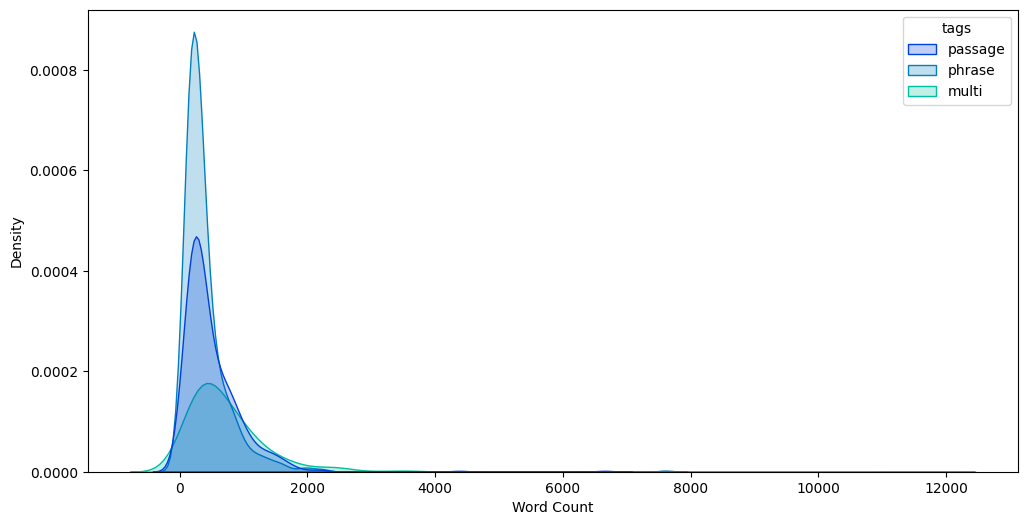

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x =df2[df2['postPlatform']=="Twitter"]['targetParagraphs'].apply(lambda x: " ".join(x)).apply(lambda x:len(x.split())),hue=df2['tags'].apply(lambda x: " ".join(x)), palette= 'winter', fill = True)
plt.xlabel('Word Count')
plt.show()

In [ ]:
df2['postPlatform']=df2['postPlatform'].apply(lambda x: "".join(x))
df2['tags']=df2['tags'].apply(lambda x: "".join(x))


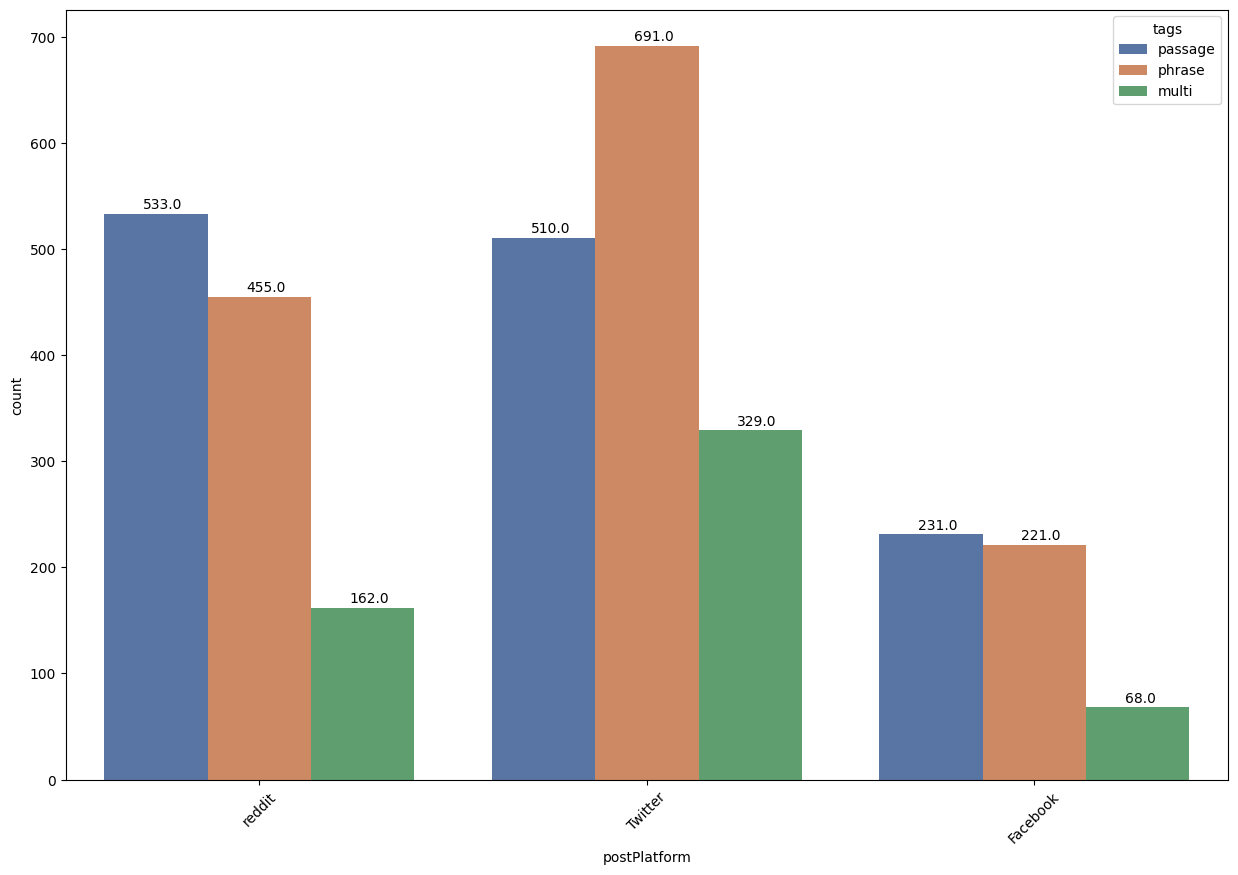

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='postPlatform', hue='tags', data=df2, palette='deep')
plt.xticks(rotation=45)

# add count labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+5))

plt.show()

In [ ]:
def wordcloud_text(text):
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
twitter_text = " ".join(df2[df2['postPlatform'] == 'Twitter']['targetParagraphs'].apply(lambda x: " ".join(x)))
fb_text = " ".join(df2[df2['postPlatform'] == 'Facebook']['targetParagraphs'].apply(lambda x: " ".join(x)))
reddit_text = " ".join(df2[df2['postPlatform'] == 'reddit']['targetParagraphs'].apply(lambda x: " ".join(x)))

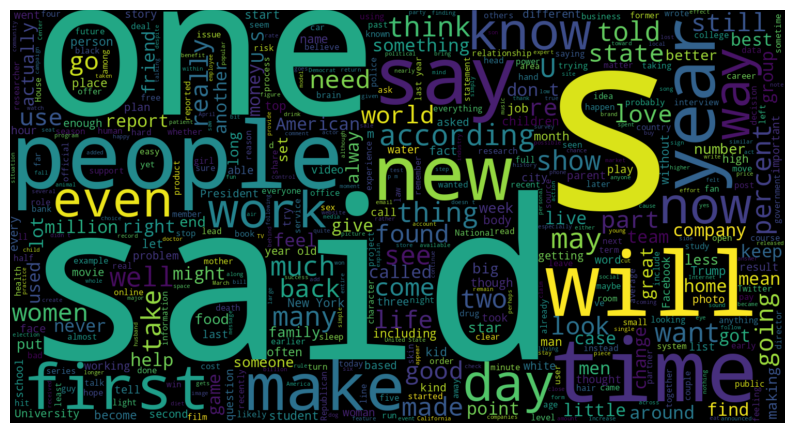

In [ ]:
wordcloud_text(twitter_text)

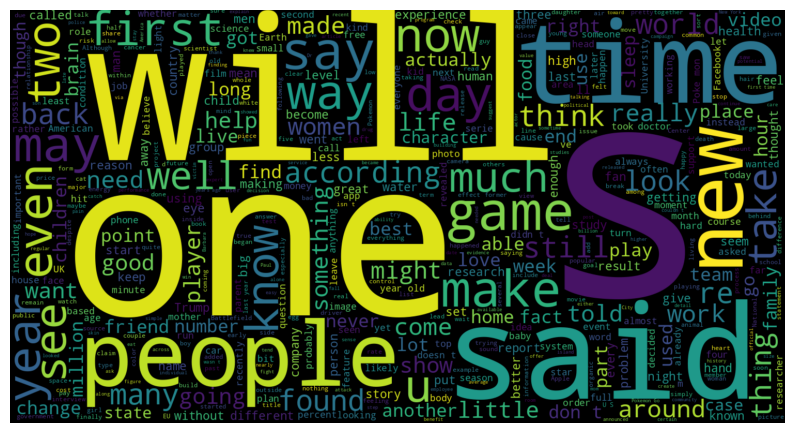

In [ ]:
wordcloud_text(fb_text)

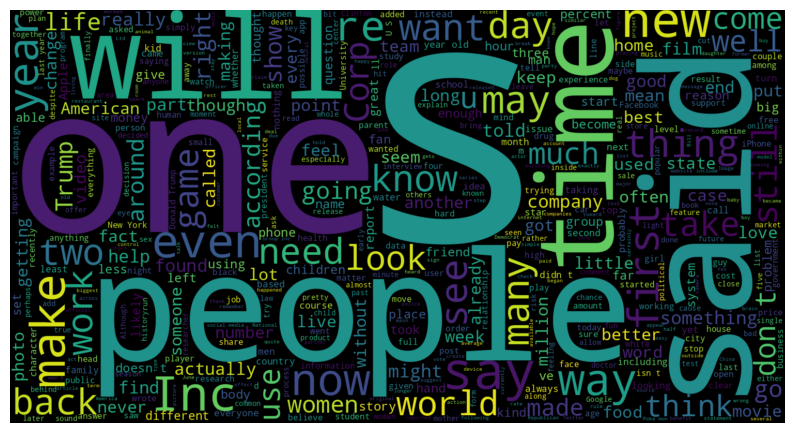

In [ ]:
wordcloud_text(reddit_text)

In [ ]:
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Real News")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()

##Data Preprocessing

In [ ]:
def strip_all_entities(text):  #######-------------------------

    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(@|https?\:\/\/)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    #text = re.sub(r'https?://\S+|www\.\S+',text) # URL shoray dibe
    #text = re.sub(r'<.*?>',text) # HTML tags shoray dibe
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def remove_hashtags(text): ###-----------------------------------
    hashtag_regex = r'\#\w+'
    return re.sub(hashtag_regex, '', text)

def remove_url_and_html(text):

    url_regex = r'http\S+|www\S+'
    html_regex = r'<.*?>'
    text_without_url = re.sub(url_regex, '', text)
    text_without_html = re.sub(html_regex, '', text_without_url)
    return text_without_html


def filter_chars(a):       ####-----------------------------------
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):    ###------------------------------
    return re.sub("\s\s+" , " ", text)

def remove_stopwords(text):     ####-------------------------------
    new_list = []
    words = text.split()
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

#lemmatization
def perform_lemmatization(text):  ###------------------------------
    wnl = WordNetLemmatizer()
    new_list = []
    words = text.split()
    for word in words:
        new_list.append(wnl.lemmatize(word))

    return " ".join(new_list)

#**WORK FLOW**


1.   **USING BASIC ML ALGOS**

  *   USING TF-IDF
  *   STATASTICAL ANALYSIS ON DATA
  *   APPLYING 2/3 BEST ALGO
  *   FINDING THE BEST ONE
  *   IMPROVING PERFORMANCE BY CHANGING HYPER PARAMETERS






2.   **USING NN TO PREDICT**

  *   GloVe Vectorization
  *   Word Embedding
  *   Creating a NN architecture based on our data
  *   Using optimization on NN model to improve performace

3. **Measuring Performance Between ML models and NN**
  * Creating a statastical Analysis how much performance improved
  * Finally creating the optput based on the requirements .





##Data Preprocessing and Feature Engineering on Dataset
1. Dropping Unnecessery columns
  *  uuid, postId, targetMedia, targetUrl, provenance, spoilerPositions.
2. Dropping Duplicate values
3. Measuring Percentage of Missing values in every column and Deciding wether to drop or feature enginner to fill them up
4. Cleaning the textual data

In [ ]:
df=df.drop(['uuid','postId','targetMedia','targetUrl','provenance','spoilerPositions','spoiler'],axis=1)

In [ ]:
df.head(2)

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,tags
0,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,",[passage]
1,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[phrase]


In [ ]:
df['postText'] = df['postText'].apply(lambda x : ' '.join(x))

In [ ]:
df['targetParagraphs'] = df['targetParagraphs'].apply(lambda x : ' '.join(x))

In [ ]:
df['tags'] = df['tags'].apply(lambda x : ' '.join(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   postText           3200 non-null   object
 1   postPlatform       3200 non-null   object
 2   targetParagraphs   3200 non-null   object
 3   targetTitle        3200 non-null   object
 4   targetDescription  2933 non-null   object
 5   targetKeywords     2116 non-null   object
 6   tags               3200 non-null   object
dtypes: object(7)
memory usage: 175.1+ KB


In [ ]:
df.drop(['targetKeywords'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['targetParagraphs'].duplicated().sum()

15

In [ ]:
df.drop_duplicates(subset=['targetParagraphs'],inplace=True)

In [ ]:
df.drop_duplicates(subset=['postText'],inplace=True)

In [ ]:
df.drop_duplicates(subset=['targetTitle'],inplace=True)

In [ ]:
df.describe()

,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,tags
count,2899,2899,2899,2899,2899,2899
unique,2899,3,2899,2899,2807,3
top,"Wes Welker Wanted Dinner With Tom Brady, But P...",Twitter,It’ll be just like old times this weekend for ...,"Wes Welker Wanted Dinner With Tom Brady, But P...",,phrase
freq,1,1496,1,1,65,1242


In [ ]:
df.drop_duplicates(subset=['targetDescription'],inplace=True)

In [ ]:
dummy = pd.get_dummies(df['postPlatform'])
df = pd.concat([df,dummy],axis=1)
df.drop(['postPlatform'],axis=1,inplace=True)

dummy = pd.get_dummies(df['tags'])
df = pd.concat([df,dummy],axis=1)
df.drop(['tags'],axis=1,inplace=True)

In [ ]:
df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription']]=df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription']].applymap(lambda x: perform_lemmatization(remove_stopwords(remove_mult_spaces(filter_chars(remove_hashtags(remove_url_and_html(strip_all_entities(x))))))))

In [ ]:
df['word_count']= df['targetParagraphs'].apply(lambda x : len(x.split()))

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer= vectorizer.fit(df['targetParagraphs'])

In [ ]:
text_columns = df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription']]

sparse_matrices=[]
# Loop over the text columns and compute TF-IDF
for column in text_columns:
    sparse_matrix = vectorizer.transform(df[column])
    sparse_matrices.append(sparse_matrix)

# Concatenate the sparse matrices horizontally
X = hstack(sparse_matrices)

In [ ]:
binary_columns = ['Facebook', 'Twitter', 'reddit','word_count']


binary_matrices = [csr_matrix(df[column].values.reshape(-1, 1)) for column in binary_columns]

# Horizontally stack the sparse matrices
X_binary = hstack(binary_matrices)

# Combine the text features and binary features
X = hstack([X, X_binary])

In [ ]:
"""transformer = ColumnTransformer([
    ('tfidf_post_text',tfidf_on_paragraph , 0),
    ('tfidf_target_paragraph',tfidf_on_paragraph,1),
    ('targetTitle',tfidf_on_paragraph,2),
    ('targetDescription',tfidf_on_paragraph,3),
],remainder='passthrough')"""

In [ ]:
"""X = df[['postText', 'targetParagraphs', 'targetTitle', 'targetDescription', 'Facebook', 'Twitter', 'reddit']]"""

In [ ]:
"""X = transformer.fit_transform(X)"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df[['multi', 'passage', 'phrase']], test_size=0.2, random_state=42)

In [ ]:
"""param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

# create the XGBoost classifier model
xgb = XGBClassifier()

# perform grid search over the parameter grid, using 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best parameters and score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# create a new XGBoost classifier model using the best parameters found by grid search
best_xgb = XGBClassifier(**best_params)

# fit the model to the training data
best_xgb.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)"""


xgb_model = XGBClassifier()

# fit the model on training data
xgb_model.fit(X_train, y_train)

# predict on test data
y_pred = xgb_model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier with desired hyperparameters
rf = RandomForestClassifier(n_estimators=1000, max_depth=50)

# Fit the model on training data
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.17259786476868327


In [ ]:
y_train_up = np.argmax(y_train.values, axis=1)
y_test_up = np.argmax(y_test.values, axis=1)

In [ ]:
from sklearn.svm import LinearSVC

# Create the SVM classifier
svm = LinearSVC(max_iter=10000,dual=False,penalty='l1')

# Train the SVM classifier
svm.fit(X_train, y_train_up)

# Make predictions on the test data
y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test_up, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5231316725978647
